In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import seed
from random import randint,random
from sklearn.neighbors import DistanceMetric
import matplotlib.pyplot as plt

In [2]:
seed(0)
latitude = [randint(0, 50) for i in range(10)]
longitude = [randint(0, 50) for i in range(10)]
latitude = [latitude[i]+random() for i in range(10)]
longitude = [longitude[i]+random() for i in range(10)]
latitude, longitude

([24.618368996675333,
  48.25050634136244,
  26.90974625596824,
  2.982785476037653,
  16.81021723599659,
  32.90216595043958,
  31.310147569319334,
  25.72983174826013,
  50.89883828796799,
  19.683983931915442],
 [30.472142715452712,
  22.100701208068365,
  37.43417183545378,
  13.610886973443801,
  32.913011053237895,
  8.966606367770758,
  18.477009776552716,
  8.86530992777164,
  48.26049231039196,
  6.8050278270130224])

In [3]:
ville = ['A','B','C','D','E','F','G','H','I','J']
data = {'latitude': latitude, 'longitude': longitude, 'ville': ville}
df = pd.DataFrame(data)
df.set_index('ville' , inplace = True)
df

,latitude,longitude
ville,,
A,24.618369,30.472143
B,48.250506,22.100701
C,26.909746,37.434172
D,2.982785,13.610887
E,16.810217,32.913011
F,32.902166,8.966606
G,31.310148,18.477010
H,25.729832,8.865310
I,50.898838,48.260492


In [11]:
df["ville"] = ville
df

,latitude,longitude,ville
ville,,,
A,24.618369,30.472143,A
B,48.250506,22.100701,B
C,26.909746,37.434172,C
D,2.982785,13.610887,D
E,16.810217,32.913011,E
F,32.902166,8.966606,F
G,31.310148,18.477010,G
H,25.729832,8.865310,H
I,50.898838,48.260492,I


In [4]:
positions = dict( ( city, (df.loc[city, 'longitude'], df.loc[city, 'latitude']) ) for city in ville)

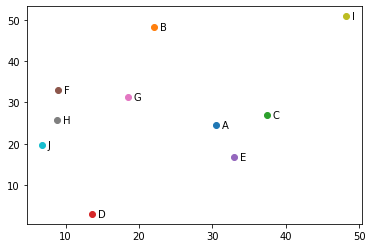

In [17]:
for s in positions:
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.8,p[1],s,horizontalalignment='left',verticalalignment='center')


In [22]:
dist = DistanceMetric.get_metric('euclidean')

In [23]:
df[['latitude','longitude']].to_numpy()

array([[24.618369  , 30.47214272],
       [48.25050634, 22.10070121],
       [26.90974626, 37.43417184],
       [ 2.98278548, 13.61088697],
       [16.81021724, 32.91301105],
       [32.90216595,  8.96660637],
       [31.31014757, 18.47700978],
       [25.72983175,  8.86530993],
       [50.89883829, 48.26049231],
       [19.68398393,  6.80502783]])

In [24]:
 dist.pairwise(df [['latitude','longitude']].to_numpy())

array([[ 0.        , 25.07107793,  7.32941056, 27.42991833,  8.18077455,
        23.04581059, 13.73546922, 21.63540091, 31.73465688, 24.17603117],
       [25.07107793,  0.        , 26.27819177, 46.05695928, 33.24752357,
        20.20089107, 17.32359359, 26.12195181, 26.29350362, 32.40376254],
       [ 7.32941056, 26.27819177,  0.        , 33.76460208, 11.06532337,
        29.09143134, 19.46117995, 28.59321718, 26.31892383, 31.4699238 ],
       [27.42991833, 46.05695928, 33.76460208,  0.        , 23.74383842,
        30.27769262, 28.74227886, 23.23679443, 59.13157589, 18.03468183],
       [ 8.18077455, 33.24752357, 11.06532337, 23.74383842,  0.        ,
        28.85101577, 20.4608434 , 25.64861502, 37.38421146, 26.26566815],
       [23.04581059, 20.20089107, 29.09143134, 30.27769262, 28.85101577,
         0.        ,  9.64273278,  7.17304948, 43.21908939, 13.39375816],
       [13.73546922, 17.32359359, 19.46117995, 28.74227886, 20.4608434 ,
         9.64273278,  0.        , 11.11416657

In [25]:
dist = DistanceMetric.get_metric('euclidean')
distances_matrix = pd.DataFrame(dist.pairwise(df[['latitude','longitude']].to_numpy()),  columns=df.ville.unique(), index=df.ville.unique())
distances_matrix

,A,B,C,D,E,F,G,H,I,J
A,0.000000,25.071078,7.329411,27.429918,8.180775,23.045811,13.735469,21.635401,31.734657,24.176031
B,25.071078,0.000000,26.278192,46.056959,33.247524,20.200891,17.323594,26.121952,26.293504,32.403763
C,7.329411,26.278192,0.000000,33.764602,11.065323,29.091431,19.461180,28.593217,26.318924,31.469924
D,27.429918,46.056959,33.764602,0.000000,23.743838,30.277693,28.742279,23.236794,59.131576,18.034682
E,8.180775,33.247524,11.065323,23.743838,0.000000,28.851016,20.460843,25.648615,37.384211,26.265668
F,23.045811,20.200891,29.091431,30.277693,28.851016,0.000000,9.642733,7.173049,43.219089,13.393758
G,13.735469,17.323594,19.461180,28.742279,20.460843,9.642733,0.000000,11.114167,35.647898,16.474309
H,21.635401,26.121952,28.593217,23.236794,25.648615,7.173049,11.114167,0.000000,46.748896,6.387256
I,31.734657,26.293504,26.318924,59.131576,37.384211,43.219089,35.647898,46.748896,0.000000,51.893378
J,24.176031,32.403763,31.469924,18.034682,26.265668,13.393758,16.474309,6.387256,51.893378,0.000000


In [47]:
distances_matrix["G"].sort_values(ascending=True)

G     0.000000
F     9.642733
H    11.114167
A    13.735469
J    16.474309
B    17.323594
C    19.461180
E    20.460843
D    28.742279
I    35.647898
Name: G, dtype: float64

In [48]:
nb_vehicle = 3
vehicles_list = ["v1","v2","v3"]

v1 = []
v2 = []
v3 = []

#On choisit nos 3 points de départ pour chaque vehicule respectivement
#v1 au pt B
#v2 au pt A
#v3 au pt H
v1.append('B')
v2.append('A')
v3.append('H')
depart_points= ['B', 'A', 'H']

In [49]:
# On itère le processus de knn pour chaque point
#On commence par le point B
distances_matrix["B"].sort_values(ascending=True)

B     0.000000
G    17.323594
F    20.200891
A    25.071078
H    26.121952
C    26.278192
I    26.293504
J    32.403763
E    33.247524
D    46.056959
Name: B, dtype: float64

In [50]:
#On élimine déjà les 4 points de départ en outre du point de dépot G
#Par ce principe le premier plus proche point est le point F
v1.append('F')
#Pt F éliminé
v1

['B', 'F']

In [51]:
#On loop le processus pour otenir le résultat final
distances_matrix["A"].sort_values(ascending=True)
v2.append('C')

In [52]:
distances_matrix["H"].sort_values(ascending=True)
v3.append('J')

In [58]:
v1.append('I')

In [59]:
v2.append('E')

In [60]:
v3.append('D')

## On loop le processus pour otenir le résultat final

In [61]:
v1

['B', 'F', 'I']

In [62]:
v2

['A', 'C', 'E']

In [63]:
v3

['H', 'J', 'D']

ValueError: not enough values to unpack (expected 2, got 1)

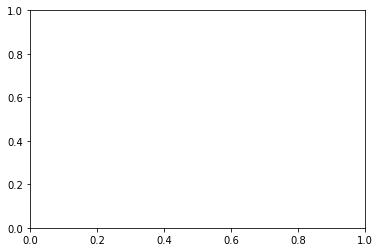

In [65]:
from matplotlib.patches import Polygon
gg = {'v1': ['G','B', 'F', 'I'],
      'v2': ['G','A', 'C', 'E'],
      'v3': ['G','H', 'J', 'D']}
gh = {'v1': (4, 2), 'v2': (2, 2), 'v3': (5, 5)}
# set colors
gk = {'v1': 'yellow', 'v2': 'skyblue', 'v3': 'red'}
# figure
fig, ax = plt.subplots()
for gemeente in gg.keys():
    poly = Polygon(gg[gemeente], label=gemeente, facecolor=gk[gemeente], edgecolor='black', linewidth=1)
    ax.add_patch(poly)
for gemeente in gh.keys():
    ax.scatter(gh[gemeente][0], gh[gemeente][1],label=gemeente)
ax.legend()
plt.autoscale()
plt.show()

In [39]:
for i in range(len(vehicles_list)):
    distances_matrix[depart_points[i]].sort_values(ascending=True)